In [1]:
### --- Standard libraries ---
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import sys

### --- Genomic tools ---
import bioframe
import pysam
from pyfaidx import Fasta  # You'll use this later for sequence extraction

### --- Custom modules ---
#from dna_io import dna_1hot
#import models as mod
import ChipFold.utils.convert as conv
import ChipFold.utils.experimentalpath as path
from ChipFold.ml.funcs import dna_1hot
import ChipFold.ml.funcs as func

In [2]:
ctcfbeds = path.ctcf_peaks 
ctcfmotif = path.ctcf_motifs

In [3]:
ctcf = bioframe.read_table(ctcfbeds, schema='bed')
ctcf['mid']=(ctcf.end+ctcf.start)/2
motif=bioframe.read_table(ctcfmotif)
motif=motif.rename(columns={0: 'chrom', 1: 'start',2:'end',3:'name',4:'score',5:'pval',6:'strand'})
#df = pd.read_csv(path.ctcf_peaks, sep="\t")
peaksmotifs = bioframe.overlap(ctcf,motif,how='inner')[['chrom','start','end','score','strand_']]
peaksmotifs = peaksmotifs.rename(columns={"strand_": "strand"})
peaksmotifs[44:48]

,chrom,start,end,score,strand
44,chr11,3714398,3714933,94.12062,-
45,chr11,3714398,3714933,94.12062,+
46,chr11,3753874,3754214,27.08572,+
47,chr11,3771294,3771760,99.22520,+


In [4]:
ctcfmotifsconv = conv.convert_ctcf_occupancy(peaksmotifs,ctcfbeds,max_occup=0.95)
ctcfmotifsconv

,chrom,start,end,strand,score_,occupancy
0,chr11,3223090,3223389,+,29.91259,0.165429
1,chr11,3223090,3223389,-,29.91259,0.165429
2,chr11,3289919,3290592,-,118.12486,0.653280
3,chr11,3289919,3290592,-,118.12486,0.653280
4,chr11,3313954,3314482,-,122.53996,0.677697
...,...,...,...,...,...,...
55068,chr17,94622682,94623017,-,45.93668,0.254049
55069,chr17,94730447,94730825,-,39.08555,0.216159
55070,chr17,94735486,94735794,-,37.52284,0.207517
55071,chr17,94758808,94759153,+,33.77861,0.186810


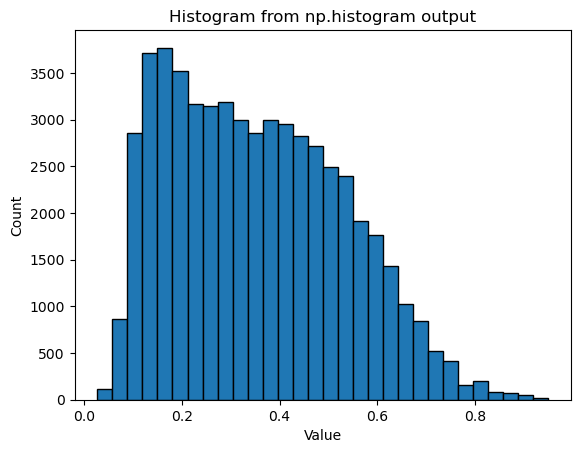

In [5]:
import matplotlib.pyplot as plt

counts, bin_edges = np.histogram(ctcfmotifsconv['occupancy'], bins=30)

plt.bar(
    bin_edges[:-1],       # left edges of bins
    counts,               
    width=np.diff(bin_edges),  # width of each bin
    edgecolor="black",
    align="edge"
)
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram from np.histogram output")
plt.show()


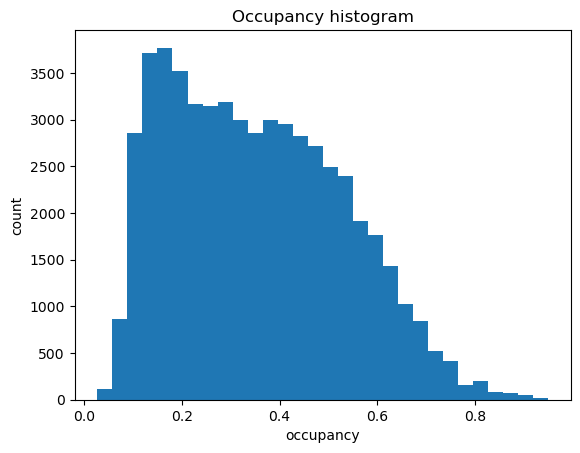

In [6]:
import matplotlib.pyplot as plt
#plt.hitogram(ctcfmotifsconv['occupancy'])
plt.hist(ctcfmotifsconv['occupancy'].dropna(), bins=30)
plt.xlabel('occupancy'); plt.ylabel('count'); plt.title('Occupancy histogram')
plt.show()


In [7]:
ctcfmotifsconv = conv.convert_ctcf_occupancy(peaksmotifs,ctcfbeds,max_occup=0.95, method='sigmoid')
ctcfmotifsconv

,chrom,start,end,strand,score_,occupancy
0,chr11,3223090,3223389,+,29.91259,0.035167
1,chr11,3223090,3223389,-,29.91259,0.035167
2,chr11,3289919,3290592,-,118.12486,0.823862
3,chr11,3289919,3290592,-,118.12486,0.823862
4,chr11,3313954,3314482,-,122.53996,0.849425
...,...,...,...,...,...,...
55068,chr17,94622682,94623017,-,45.93668,0.084558
55069,chr17,94730447,94730825,-,39.08555,0.058458
55070,chr17,94735486,94735794,-,37.52284,0.053662
55071,chr17,94758808,94759153,+,33.77861,0.043635


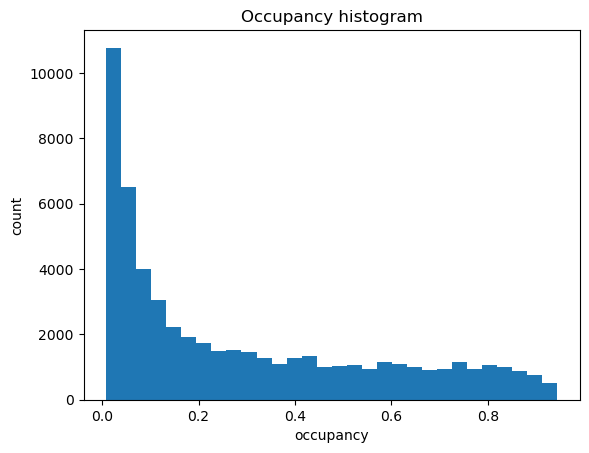

In [8]:
plt.hist(ctcfmotifsconv['occupancy'].dropna(), bins=30)
plt.xlabel('occupancy'); plt.ylabel('count'); plt.title('Occupancy histogram')
plt.show()